# Convolutional Neural Networks

**Time**
- Teaching: 2.5 hours
- Challenges: 30 minutes

**Questions**
- "Understand "


**Learning Objectives**
- ""

* * * * *

## Import packages

For this notebook, instead of importing specific functions, we will import modules that contain functions.

**Old way:**

`from keras.layers import Dense`

`model.add(Dense(...))`

**New way:**

`from keras import layers`

`model.add(layers.Dense(...))`

But why change it up? I had trouble myself in the past understanding the way modules work, so code would break due simply to the way imports were done. Let's avoid that by getting comfortable with python modules!

In [1]:
from keras import layers
from keras import models
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

2022-02-27 22:57:52.011206: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-27 22:57:52.011240: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

### CIFAR10

So we get sidetracked at work and instead of creating a model capable of capturing digit information on a check, we want to build a classifier for animals and vehicles!

We shop around and find an interesting image dataset called [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html).

This dataset consists of:
- 60,000 total images
- 10 classes (6,000 images per class)

Example images of each class are shown below:

![CIFAR10 classes](https://maet3608.github.io/nuts-ml/_images/cifar10.png)

### Loading the dataset

In [3]:
def load_cifar10(subset = True):
    """
    Loads a training, validation, and test set of CIFAR10 images.
    
    When subset=TRUE:
    Returns only a subset of the mnist dataset.
    Especially important to use if you are on datahub and only have 1-2GB of memory.
    """
    if subset:
        N_TRAIN = 8000
        N_VALIDATION = 2000
        N_TEST = 2000
    else:
        N_TRAIN = 40000
        N_VALIDATION = 10000
        N_TEST = 10000
    
    (x_train_and_val, y_train_and_val), (x_test, y_test) = cifar10.load_data()
    
    x_train = x_train_and_val[:N_TRAIN,:,:]
    y_train = y_train_and_val[:N_TRAIN]
    
    x_val = x_train_and_val[N_TRAIN: N_TRAIN + N_VALIDATION,:,:]
    y_val = y_train_and_val[N_TRAIN: N_TRAIN + N_VALIDATION]
    
    x_test = x_test[:N_TEST]
    y_test = y_test[:N_TEST]
    
    return x_train, y_train, x_val, y_val, x_test, y_test
    

In [4]:
x_train, y_train, x_val, y_val, x_test, y_test = load_cifar10()

### Input Data Due Dillegence

We will borrow some of our previous functions in order to get a feel for CIFAR10.

In [5]:
def data_summary(data):
    """
    Takes a list of our data partitions and returns the shape.
    """
    
    for i, data_partition in enumerate(data):
        if i == 0:
            print("Training Data")
        elif i == 2:
            print()
            print("Validation Data")
        elif i == 4:
            print()
            print("Testing Data")

        print(f"Shape: {data_partition.shape}")

In [6]:
data_summary([x_train, y_train, x_val, y_val, x_test, y_test])

Training Data
Shape: (8000, 32, 32, 3)
Shape: (8000, 1)

Validation Data
Shape: (2000, 32, 32, 3)
Shape: (2000, 1)

Testing Data
Shape: (2000, 32, 32, 3)
Shape: (2000, 1)


In [7]:
one_image = x_train[0]
one_image.shape

(32, 32, 3)

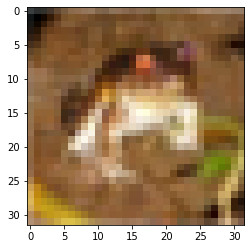

In [8]:
plt.imshow(one_image);

Can you tell what the class of the image above is!?

Let's show more images with their correct class from the CIFAR10.

In [9]:
def plot_images(x, y, random=False):
    """
    Plots 25 images from x data with titles set as y.
    Set random=True if you want
    """
    
    if random:
        indices = np.random.choice(range(y.shape[0]), 25, replace=False)
    
    else:
        indices = np.array(range(25))
    
    fig, axes = plt.subplots(5,5, figsize = (15,15))
    axes = axes.ravel()
    
    for ax, index in zip(axes, indices):
        ax.imshow(x[index])
        ax.set_title(f"Class: {y[index][0]}", size=15)
    
    plt.tight_layout()
    
    return plt.show()

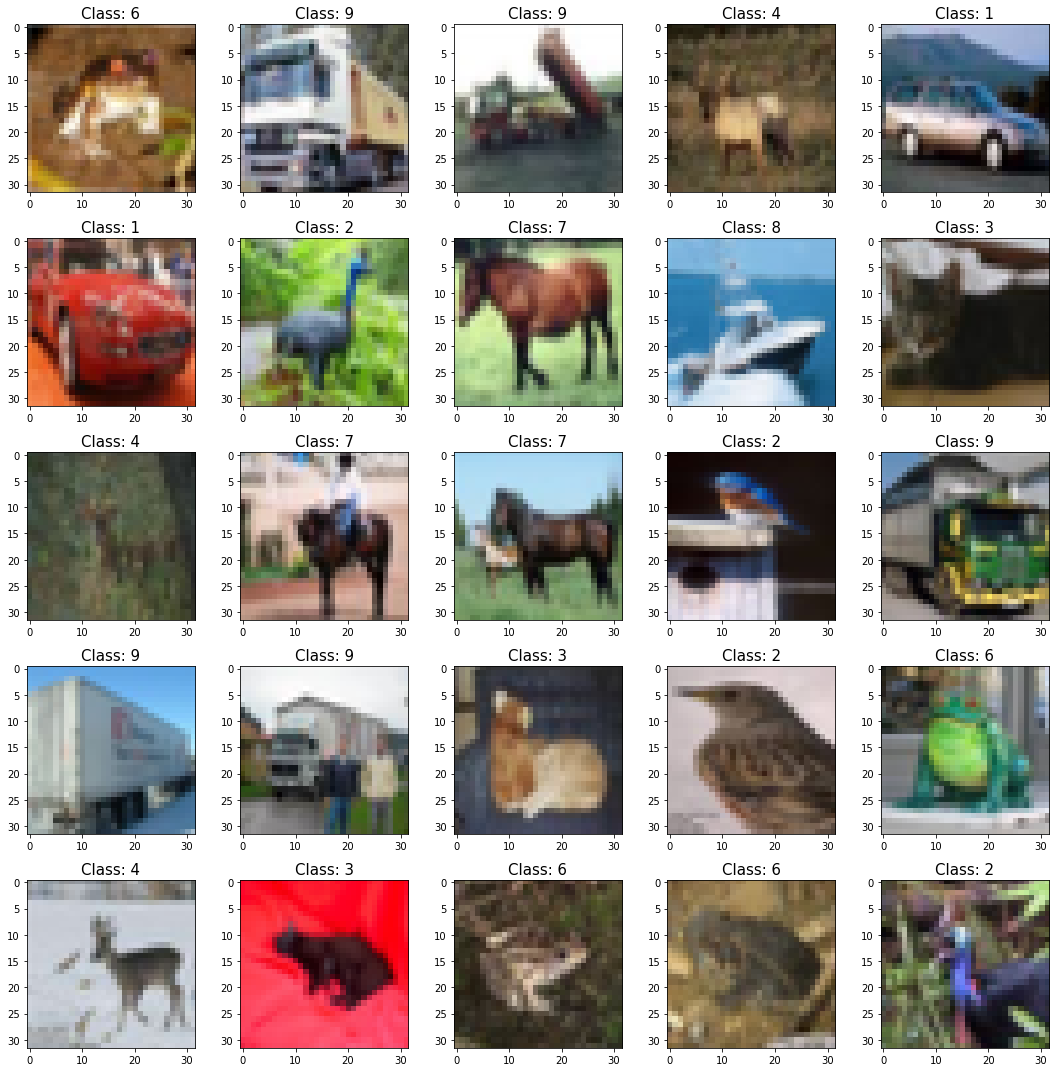

In [10]:
plot_images(x_train, y_train)

Oh no, the class labels are just digits!

## Challenge 1: Translate Classes

Create a function `translate_class()` that uses the correct class name for the target classes (truck, horse, etc..).

In [11]:
def translate_class():
    # Your code here
    return None

In [12]:
## TODELETE SOLUTION
def translate_class(y):
    """
    Takes a class index [0-9] and returns the CIFAR10 class category.
    """
    # Create a list of categories
    categories = ["airplane", 
                 "automobile",
                 "bird",
                 "cat",
                 "deer",
                 "dog",
                 "frog",
                 "horse",
                 "ship",
                 "truck"]
    
    return categories[y]
    
    
def translate_classes_fancy(y):
    """
    Use a key-value paired dictionary to translate target class
    """
    # Create a list of categories
    categories = ["airplane", 
                 "automobile",
                 "bird",
                 "cat",
                 "deer",
                 "dog",
                 "frog",
                 "horse",
                 "ship",
                 "truck"]
    
    # Use a dictionary comprehesion to attach class number to category
    category_dict = {key : value for key, value in zip(list(range(10)), categories)}
    
    return category_dict[y]

## Challenge 2: Plotting Image Classes

Create a new function `my_imageplotter()` that uses the correct class name for the target classes (truck, horse, etc..).

- Use the above function `plot_images()` as a starting point!

- Use the [keras CIFAR10 documentation](https://keras.io/api/datasets/cifar10/) as a guide to understand how the labeled classes.

In [13]:
def my_imageplotter():
    # your code here
    return None

In [14]:
## TO DELETE TEST SOLUTION

def my_imageplotter(x, y, random=False):
    """
    Plots 25 images from x data with titles set as y.
    Set random=True if you want
    """
    
    if random:
        indices = np.random.choice(range(y.shape[0]), 25, replace=False)
    
    else:
        indices = np.array(range(25))
    
    fig, axes = plt.subplots(5,5, figsize = (15,15))
    axes = axes.ravel()
    
    for ax, index in zip(axes, indices):
        # New line here
        title = translate_class(y[index][0])
        ax.imshow(x[index])
        ax.set_title(f"Class: {title}", size=15)
    
    plt.tight_layout()
    
    return plt.show()

Test your function below!

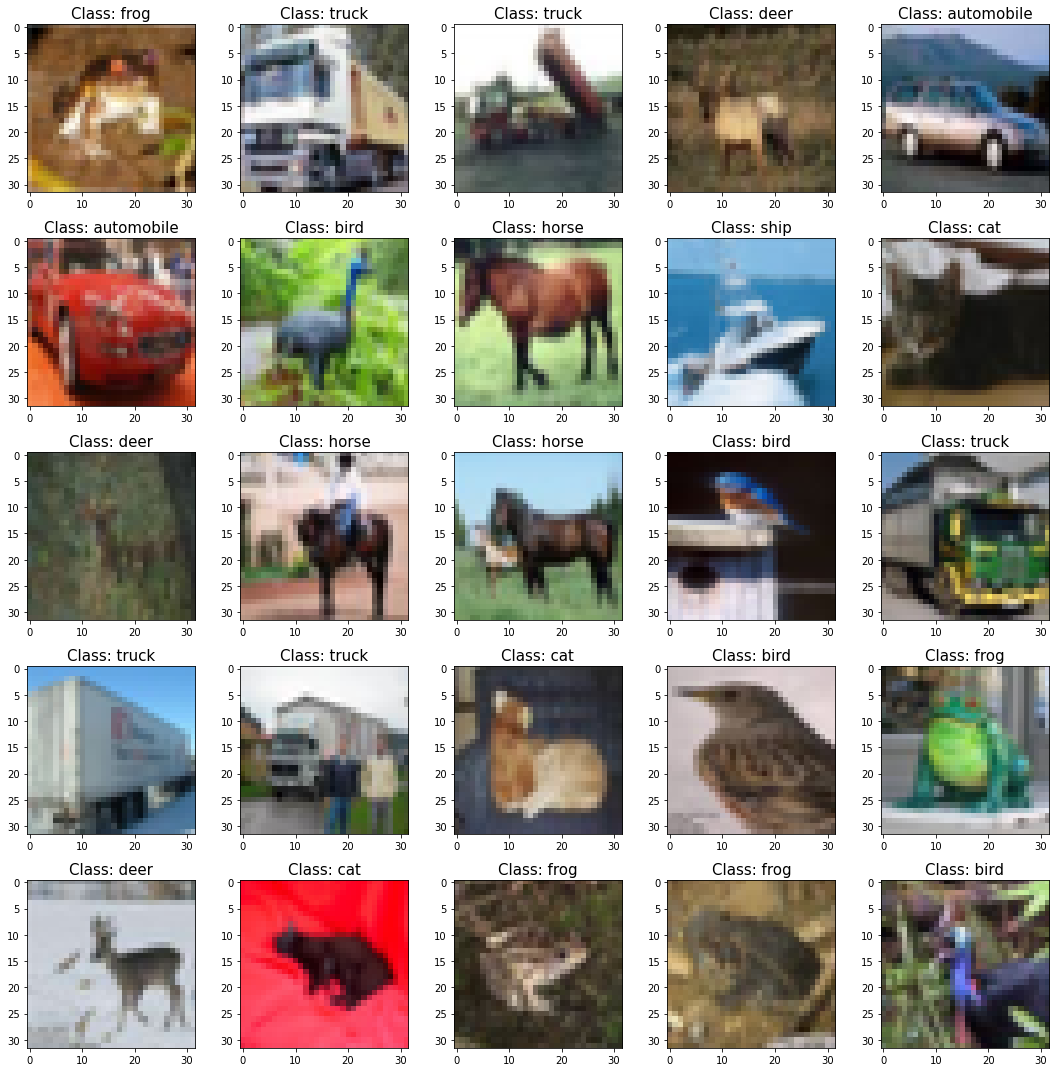

In [15]:
my_imageplotter(x_train, y_train)

Let's make sure we have balanced class distributions.

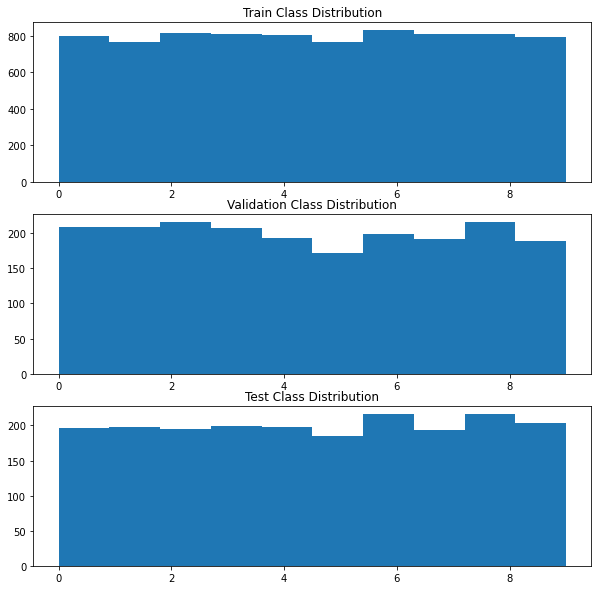

In [16]:
def plot_target_distributions(targets, titles):
    """
    Returns the distribution of target classes.
    """
    
    fig, axes = plt.subplots(3,1, figsize = (10,10))
    
    for ax, target, title in zip(axes, targets, titles):
        ax.hist(target) 
        ax.set_title(f"{title} Class Distribution")
    
    return plt.show()

plot_target_distributions([y_train, y_val, y_test], ["Train", "Validation", "Test"])

The last step to prepping our data for modeling is data transformation. 

In [17]:
def x_transform_one_dim(x_data):
    """
    Transforms image data to one dimension.
    """
    
    flatten = x_data.reshape((x_data.shape[0], (x_data.shape[1] * x_data.shape[2]*x_data.shape[3])))
    scaled = flatten.astype('float32') / 255
    
    return scaled
    

In [18]:
def transform_data_onedim(x_train, y_train, x_val, y_val):
    """
    Transforms training and validation image data into a single dimension and targets to categorical.
    """
    
    x = {}
    for x_data, name in zip([x_train, x_val], ["x_train", "x_val"]):
        x_trans = x_transform_one_dim(x_data)
        x[name] = x_trans
    
    y = {}
    
    for y_data, name in zip([y_train, y_val], ["y_train", "y_val"]):
        y[name] = to_categorical(y_data)
    
    return x['x_train'], y['y_train'], x['x_val'], y['y_val']

For our first model, let's build a standard (vanilla) feed-forward neural network.

In [19]:
INPUT_SHAPE_ONE_DIM = x_train.shape[1]*x_train.shape[2]*x_train.shape[3]

In [20]:
vanilla_nn = models.Sequential()
vanilla_nn.add(layers.Dense(512, activation= "relu", input_shape=(INPUT_SHAPE_ONE_DIM,)))
vanilla_nn.add(layers.Dropout(0.5))
vanilla_nn.add(layers.Dense(512, activation= "relu"))
vanilla_nn.add(layers.Dropout(0.5))
vanilla_nn.add(layers.Dense(10, activation="softmax"))

vanilla_nn.compile(optimizer= "rmsprop",
                  loss = "categorical_crossentropy",
                  metrics = ["accuracy"])

2022-02-27 22:58:02.615636: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-27 22:58:02.615670: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-27 22:58:02.615700: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-seanperez): /proc/driver/nvidia/version does not exist
2022-02-27 22:58:02.616038: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In order to save memory with data transformation, instead of creating new objects in our global environment of our transformed data, we will create a function that uses the transformation function within.

Since we will try multiple transformations, this will make our transformed data only temporary and not gunk up our memory!

In [21]:
def transform_train_model(transformation_func, model, x_train, y_train, x_val, y_val, epochs = 20, batch_size = 128):
    """
    Takes a transformation function, a compiled model, data, and optional fitting arguments.
    
    Returns the model object
    """
    
    # Transforms the data
    x_train_trans, y_train_trans, x_val_trans, y_val_trans = transformation_func(x_train, y_train, x_val, y_val)
    
    # Trains the model
    trained_model = model.fit(x_train_trans, 
                              y_train_trans, 
                              epochs=epochs,
                              batch_size=batch_size,
                              validation_data=(x_val_trans, y_val_trans))
 
    return trained_model
 

In [22]:
vanilla_history = transform_train_model(transform_data_onedim,
                                        vanilla_nn,
                                        x_train, y_train, x_val, y_val)

2022-02-27 22:58:08.475793: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
63/63 [==============================] - 2s 22ms/step - loss: 2.6546 - accuracy: 0.1353 - val_loss: 2.1540 - val_accuracy: 0.1705
Epoch 2/20
63/63 [==============================] - 1s 20ms/step - loss: 2.2007 - accuracy: 0.1719 - val_loss: 2.1889 - val_accuracy: 0.1740
Epoch 3/20
63/63 [==============================] - 1s 18ms/step - loss: 2.1363 - accuracy: 0.1949 - val_loss: 2.0756 - val_accuracy: 0.2235
Epoch 4/20
63/63 [==============================] - 1s 18ms/step - loss: 2.1123 - accuracy: 0.2101 - val_loss: 2.0317 - val_accuracy: 0.2425
Epoch 5/20
63/63 [==============================] - 1s 18ms/step - loss: 2.0722 - accuracy: 0.2274 - val_loss: 1.9769 - val_accuracy: 0.2540
Epoch 6/20
63/63 [==============================] - 1s 17ms/step - loss: 2.0516 - accuracy: 0.2371 - val_loss: 1.9653 - val_accuracy: 0.2605
Epoch 7/20
63/63 [==============================] - 1s 19ms/step - loss: 2.0272 - accuracy: 0.2420 - val_loss: 1.9692 - val_accuracy: 0.2895
Epoch 8/20
63

In [23]:
def plot_epoch_accuracy(history_dict):
    """
    Plots the training and validation accuracy of a neural network.
    """
    
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, color = 'navy', alpha = 0.8, label='Training Accuracy')
    plt.plot(epochs, val_acc, color = 'green', label='Validation Accuracy')
    plt.title('Training and validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    return plt.show()

In [24]:
def plot_wrong_predictions(transformation_func, model, x_test, y_test):
    """
    Plots 25 incorrectly predicted images.
    """
    
    # Transform data
    x_test_trans = transformation_func(x_test)[:26]
    y_test_trans = to_categorical(y_test)[:26]
    
    # Format predictions and targets
    predictions = model.predict(x_test_trans)
    predicted = np.argmax(predictions, axis = 1)
    target = np.argmax(y_test_trans, axis = 1)
    
    # Set up subplots
    fig, axes = plt.subplots(5,5, figsize = (25,25))
    axes = axes.ravel()
    
    for ax, index in zip(axes, range(25)):
        ax.imshow(x_test[index], cmap=plt.cm.binary, interpolation='nearest')
        prediction_title = translate_class(predicted[index])
        target_title = translate_class(target[index])
        
        # Color title based on if prediction is correct
        if predicted[index] == target[index]:
            color = "green"
        else:
            color = "red"
        ax.set_title(f"Predicted {prediction_title}, Actual is {target_title}", color = color)
    
    return plt.show()

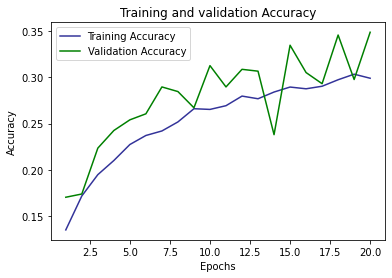

In [25]:
plot_epoch_accuracy(vanilla_history.history)

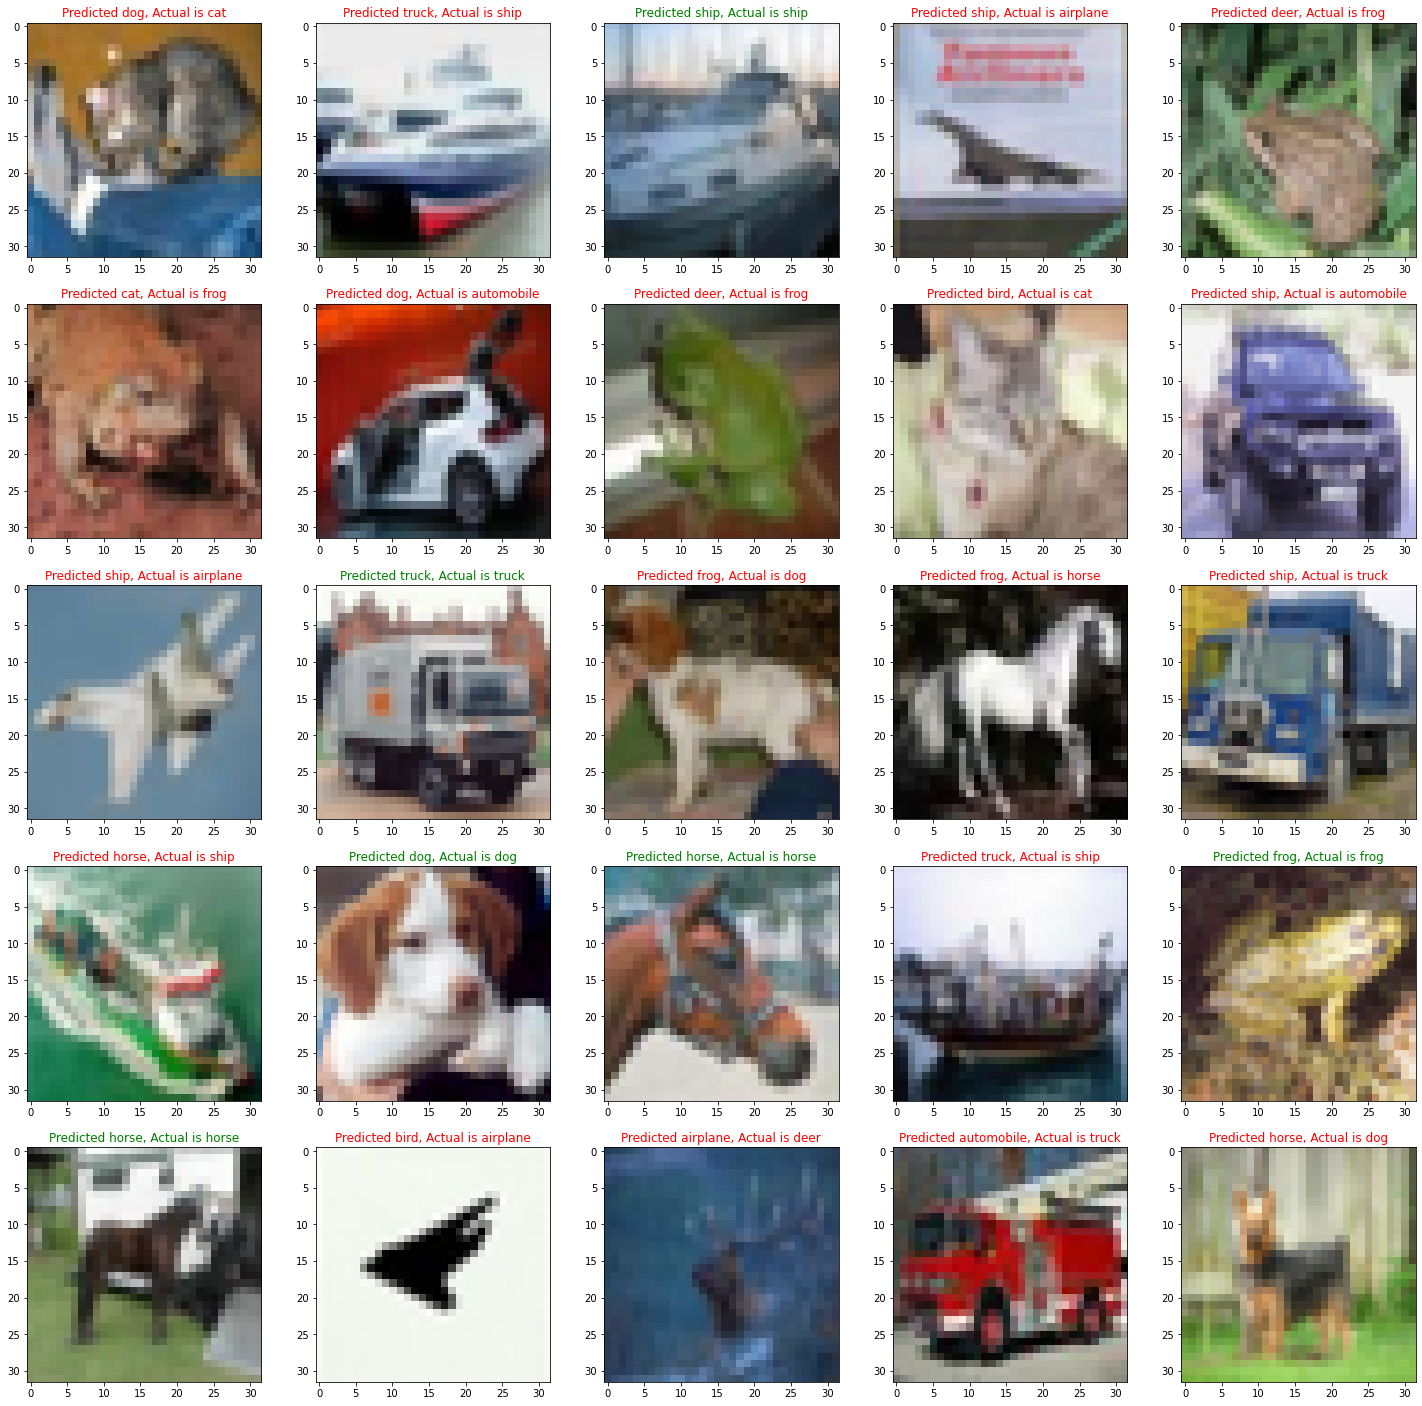

In [26]:
plot_wrong_predictions(x_transform_one_dim, vanilla_nn, x_test, y_test)

Interesting..... 

While this model architecture that gave us great results to predict the MNIST handwritten digits, it performs poorly on the CIFAR image classification task...

#### Challenge 3
1. Why do you think the vanilla neural network performs worse on CIFAR than it did on the MNIST image classification?
2. Why might we prefer a convolutional neural network to 

### Convolutional Neural Network

Let's jump right in and build a convolutional neural network!

In [27]:
def x_transform_three_dim(x_data):
    """
    Transforms image data into three dimensions.
    """
    
    scaled = x_data.astype('float32') / 255
    
    return scaled
    

In [28]:
def transform_data_threedim(x_train, y_train, x_val, y_val):
    """
    Transforms training and validation image data into a single dimension and targets to categorical.
    """
    
    x = {}
    for x_data, name in zip([x_train, x_val], ["x_train", "x_val"]):
        x_trans = x_transform_three_dim(x_data)
        x[name] = x_trans
    
    y = {}
    
    for y_data, name in zip([y_train, y_val], ["y_train", "y_val"]):
        y[name] = to_categorical(y_data)
    
    return x['x_train'], y['y_train'], x['x_val'], y['y_val']

Before writing code to build a convolutional neural network, let's quickly review what the significance a convolutional neural network is, the convolutional layer.

#### Convolutional layers
As reviewed in our slides, convolutional layers contain *filters* that we *stride* along our image to find matching patterns, producing a *response map*. 

![title](https://qph.fs.quoracdn.net/main-qimg-6428cf505ac1e9e1cf462e1ec8fe9a68)
- The green boxes represent the pixels in our input image.
- The yellow boxes represent the *filter*.
- The movement of the filter represents the *stride*.
- The red boxes represent our *response map*.

We initialize a convolutional neural network the same way we did a vanilla neural network.

In [29]:
convnet = models.Sequential()

We now add our first convolutional layer. 

*Note: I use the argument names here to clarify what parameters we are passing into our neural network including default values.*

In [30]:
convnet.add(layers.Conv2D(filters = 32,
                          kernel_size = (3, 3),
                          strides = (1,1),
                          activation= "relu",
                          input_shape=(32, 32, 3)))

We define our first Convolution layer using:
`.add(layers.Conv2D(...))`
- This adds a convolutional layer to our model object.

`filters = 32`
- Initializes 32 filters total.
- Each filter slides along the entire image.
- Each filter produce a response map.

`kernel_size = (3, 3)`
- Specifies the "kernel" size of the filters.
- (3 x 3) : (height x width)
    
`strides = (1,1)`
- The filter strides by one unit in both the horizontal and vertical dimension.
- (1 x 1) or (height stride x width stride)

`activation= "relu"`
- We used a relu (Rectified Linear Unit) activation function on the output from sliding our filter over the input.
- This simply causes any negative values to be 0, and other values to stay the same.

`input_shape=(32, 32, 3)`
- Specifies the shape of our input data
- 32 pixels wide
- 32 pixels high
- 3 channels deep (Red, Green, Blue)

#### Max Pooling layers
After a convolutional layer, we can downsample a *reponse map* using a maxpooling layer. This simply takes the maximum value for a given kernel-size sliding along our response map, much like a filter. 

Maxpooling has a dual benefit. Not only does it effectively compress the amount of data we must process, but it also improves our focus on finding **good** matches, making our model less specific about the location where it was found (local translation invariance).

![title](https://nico-curti.github.io/NumPyNet/NumPyNet/images/maxpool.gif)
- The blue boxes represent our *response map*.
- The purple box represent our kernel size (2 x 2).
- The yellow box is the output of our maxpooling operation.

In [33]:
convnet.add(layers.MaxPooling2D(pool_size=(2, 2),
                               strides = None))

`.add(layers.MaxPooling2D(...))`
- Adds a maxpooling layer.

`pool_size=(2, 2)`
- Defines the "kernel" size of our maxpooling operation.
- Will return a single value from this entire window

`strides = None`
- None makes it so there is no overlap during striding, just continue to inputs not in the previous window.

We add two more convolutional layers, separated by a maxpooling layer.

In [34]:
convnet.add(layers.Conv2D(64, (3, 3), activation= "relu"))
convnet.add(layers.MaxPooling2D((2, 2)))
convnet.add(layers.Conv2D(64, (3, 3), activation= "relu"))

#### Dense layers
Finally we return to our good old dense layer, the same we used in our vanilla neural networks. 

Before we can use our dense layer, we first flatten the data passed through the convolutional and maxpooling layers (which are high dimensional) into a single dimension.

We then use a dense layer that is able to *look* at the all of the features extracted from the convolutional operations, and optimize its weights to correctly associate these features with the correct class.

Finally we have our output layer, which contains the amount of classes we are interested in with a softmax activation function, giving us the probability for each class in our prediction.

In [35]:
convnet.add(layers.Flatten())
convnet.add(layers.Dense(64, activation= "relu"))
convnet.add(layers.Dense(10, activation= "softmax"))

#### Compiling
We now compile our model as we have done previously.

In [36]:
convnet.compile(optimizer= "rmsprop",
               loss= "categorical_crossentropy", 
               metrics= ["accuracy"])

Below we train our model, a quick warning that this will take a while!

In [37]:
convnet_history = transform_train_model(transform_data_threedim,
                                        convnet,
                                        x_train, y_train, x_val, y_val)

Epoch 1/20
63/63 [==============================] - 5s 62ms/step - loss: 2.1809 - accuracy: 0.2009 - val_loss: 1.9359 - val_accuracy: 0.3130
Epoch 2/20
63/63 [==============================] - 4s 59ms/step - loss: 1.9061 - accuracy: 0.3122 - val_loss: 2.4299 - val_accuracy: 0.2180
Epoch 3/20
63/63 [==============================] - 4s 56ms/step - loss: 1.7627 - accuracy: 0.3701 - val_loss: 1.7012 - val_accuracy: 0.3660
Epoch 4/20
63/63 [==============================] - 4s 57ms/step - loss: 1.6422 - accuracy: 0.4067 - val_loss: 1.6164 - val_accuracy: 0.4020
Epoch 5/20
63/63 [==============================] - 4s 57ms/step - loss: 1.5598 - accuracy: 0.4414 - val_loss: 1.6872 - val_accuracy: 0.3800
Epoch 6/20
63/63 [==============================] - 4s 64ms/step - loss: 1.4859 - accuracy: 0.4679 - val_loss: 1.4914 - val_accuracy: 0.4485
Epoch 7/20
63/63 [==============================] - 4s 62ms/step - loss: 1.4291 - accuracy: 0.4910 - val_loss: 1.6055 - val_accuracy: 0.3985
Epoch 8/20
63

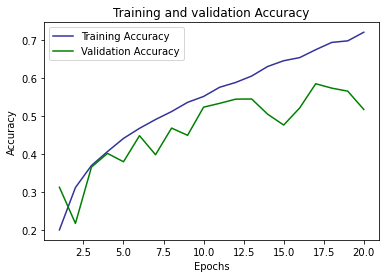

In [38]:
plot_epoch_accuracy(convnet_history.history)

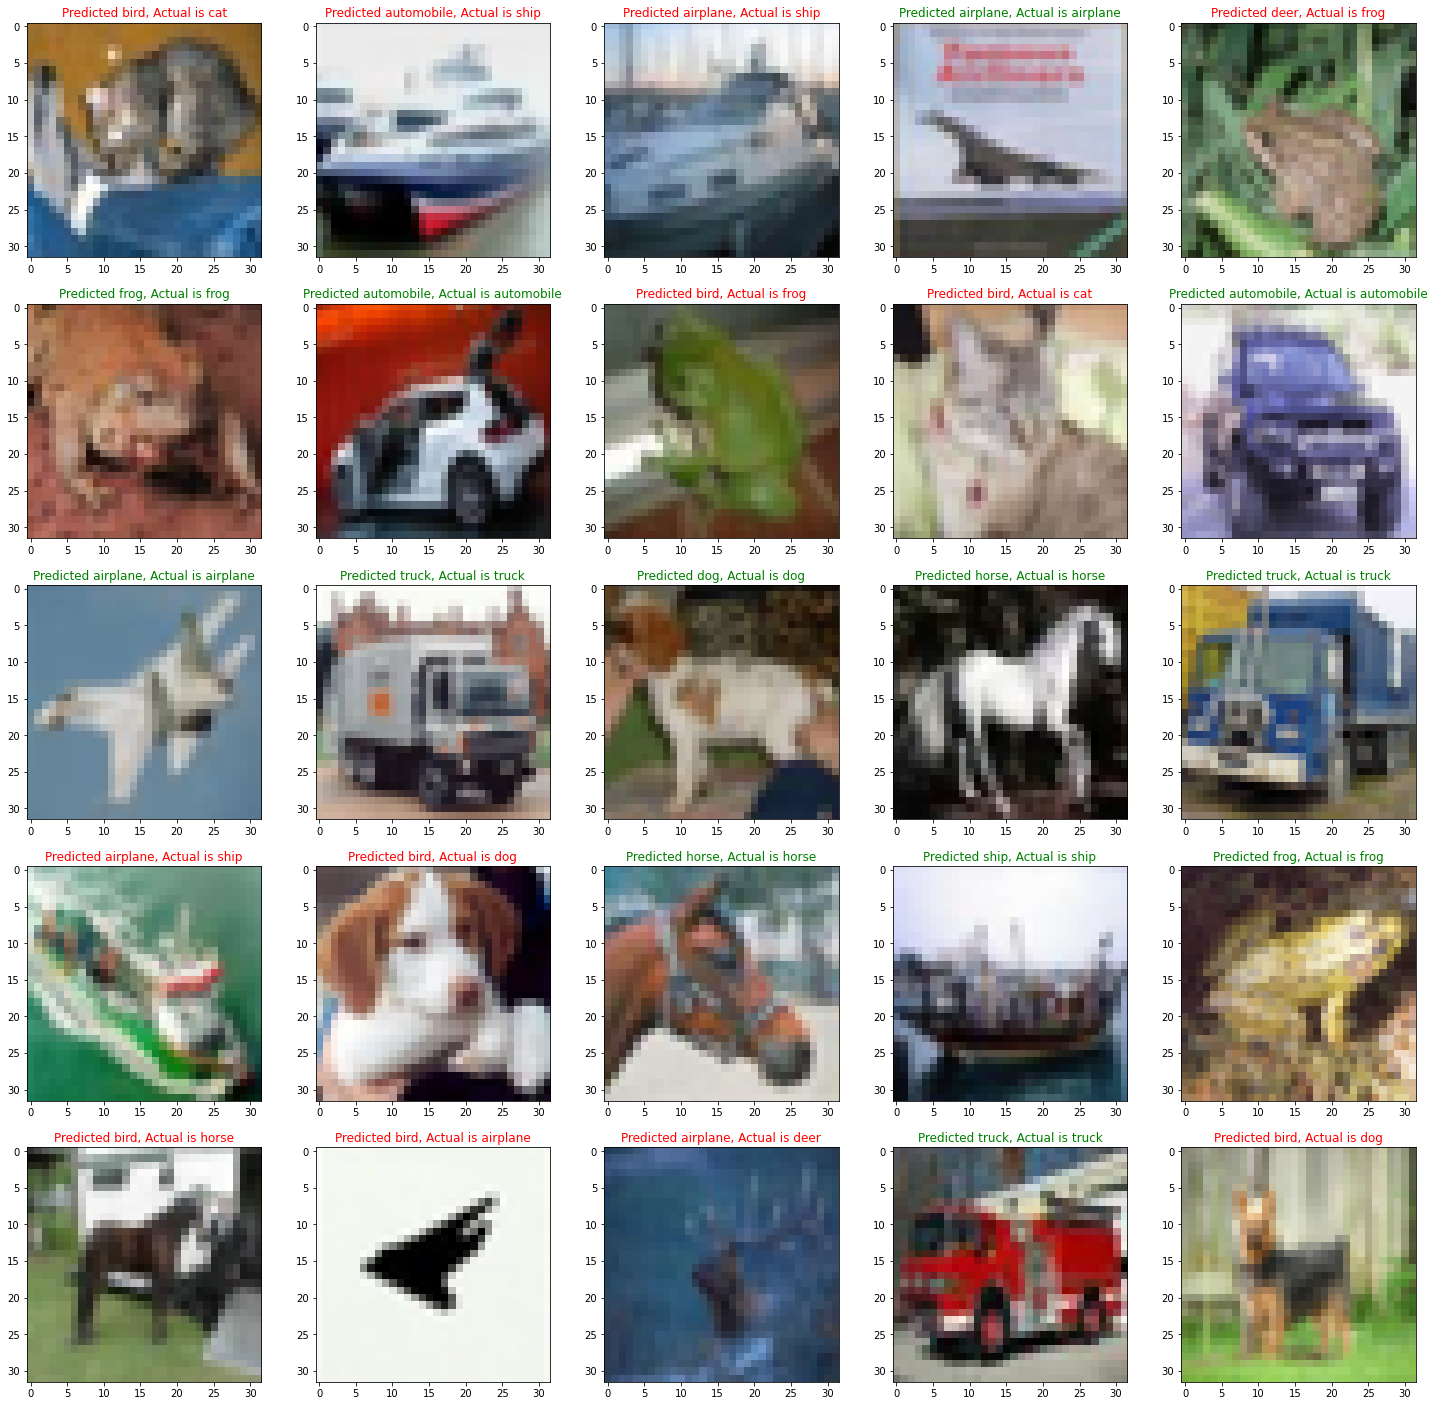

In [40]:
plot_wrong_predictions(x_transform_three_dim, 
                      convnet,
                      x_test,
                      y_test)

## Challenge 4: Build your own neural network

1. Build your own convolution neural network with a custom architecture.
2. Plot the training and validation accuracy on the test set.


The neural networks we built are relatively small compared to those used in applications such as google photos or inaturalist.

Let's compare the architecture from the models we built with a popular convolutional neural network called [VGG16](https://arxiv.org/pdf/1409.1556.pdf). 

### Vanilla Neural Network

In [41]:
vanilla_nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


### Convolutional Neural Network

In [42]:
convnet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

### VGG16

![title](https://alexisbcook.github.io/assets/vgg16_keras.png)

## Hardware for Deep-Learning

We are highly restricted in our ability to train larger models due to our hardware. While there are many aspects about hardware that are critical to deep learning, we will focus on one major concept, the Processing Unit.

All computers have a Central Processing Unit (CPU) that performs all of the operations your computer needs to do, including running all this python code!

For deep-learning, CPUs are not very efficient at running the massive number operations required to train deep neural networks. That's where the Graphical Proccessing Unit (GPU) comes into the picture. 

GPUs, originally designed to process many operations to render complex graphics have been repurposed for training neural networks! This key innovation behind this change came in 2007 when NVIDIA launched [CUDA](https://developer.nvidia.com/about-cuda), a programming interface for GPUs which allows highly parallelizable computations. Since many neural networks operations are parallelizable, this has become the go-to way to train large neural network models.

*Loosely based on: (Chollet 2018) Deep Learning with Python*

The code below allows you to see the available hardware (CPUs, GPUs) that can be used in tensorflow/keras.

In [43]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1434876305202906997
]


### Final words

So are we doomed? Can only the tech giants create deep neural networks?

Well.. sorta, but we do have alternatives, we just need to be creative! Here are some options to train your own deep neural networks that may aren't possible on your own machine:
1. Use other services

    - Google Colab offers free could instances of a Jupyter Notebook-like environment with GPUs onboard even in their free tier!
    - Amazon Web Services (AWS) allows you to use their hardware in "EC2 instances" to train your models offerring a [dizzying number of options](https://aws.amazon.com/ec2/instance-types/). Note that this can be expensive and is billed by time!
    
2. Transfer learning
    - Why build your model from the ground up?
    - Transfer learning uses an existing model with all it's tuned weights, and retrains just the final portion of the model to a new task.
    - We will explore this in the next notebook!